In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 学習モデル
import lightgbm

# SHAP
import shap
from sklearn.ensemble import RandomForestRegressor

# Permutation Importance
from sklearn.inspection import permutation_importance

# その他
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split


In [57]:
df_house=pd.read_csv('7-4-18_data.tsv',sep='\t',header=0) 
word = df_house.iloc[:,208:228] #検索キーワード("Q25"全て)
data_man = df_house.iloc[:,112:118] #サイトの使いやすさに関する満足度("Q8"全て)
df_house = df_house.fillna({"Q29": 29})
data_site = df_house.iloc[:,[2,240,49]] #使用サイトをまとめたもの("SQ2","Q29","Q27",Q30)
datasite = data_site.dropna()
data_best = df_house["Q12_2"] #最もよく見たサイト
# data3_ = df_house.iloc[:, [188, 190]] 
data_act = df_house.iloc[:, 228:232] #賃貸情報サイトに対する行動("Q26"全て)
manzoku = df_house.iloc[:, 52:71] #表示に対する満足度("Q2"全て)
unite_data = pd.concat([word, data_man,data_site, data_best, data_act, manzoku], axis = 1)
unite_data = unite_data.dropna() #欠損値処理
unite_data = unite_data.astype("int")
unite_qst = unite_data.replace({"Q29":[3,4,5,6,7,10,13], "SQ7": [3,4,5,6,7,10,13]}, 28)
result = data_site["Q29"] == data_site["SQ7"] #数値の一致かどうか調べる
data_site['hantei'] = result.map({True: 1, False: 0}) #一致していた場合1,そうでない場合0
unite_data = unite_data.drop("Q29", axis = 1)
unite_manzoku = pd.concat([unite_data, unite_qst], axis = 1)
unite_manzoku


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Q25[1],Q25[2],Q25[3],Q25[4],Q25[5],Q25[6],Q25[7],Q25[8],Q25[9],Q25[10],...,Q2_10,Q2_11,Q2_12,Q2_13,Q2_14,Q2_15,Q2_16,Q2_17,Q2_18,Q2_19
0,1,1,0,0,0,0,0,0,0,0,...,9,9,9,9,9,10,10,10,9,7
1,0,0,0,0,0,0,0,0,0,0,...,6,7,6,7,8,6,7,6,7,8
2,0,0,0,0,0,1,0,0,1,1,...,7,6,5,6,5,5,6,6,6,7
3,1,0,1,0,0,1,0,0,0,0,...,9,9,9,9,9,8,9,9,8,8
4,0,0,1,0,0,0,0,0,0,0,...,7,7,7,7,7,6,7,8,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,0,0,1,0,0,1,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1321,0,0,0,0,0,0,0,1,0,0,...,7,5,5,5,8,7,4,8,8,9
1322,0,1,0,0,0,0,0,0,0,0,...,10,10,10,7,8,10,9,9,9,10
1323,0,0,0,1,0,1,1,0,0,0,...,6,6,6,6,7,7,7,7,7,7


In [61]:
target_label = "Q29"

unite_manzoku = unite_manzoku.loc[:,~unite_manzoku.columns.duplicated()]
y = unite_manzoku[target_label]
X = unite_manzoku.drop(target_label, axis=1)
X_data1 = X.iloc[:, 20:26]
X_data2 = X.iloc[:, 33:52]
X_data = pd.concat([X_data1, X_data2], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state = 0)

In [62]:
# lgbm = lightgbm.LGBMClassifier(random_state = 0)
# lgbm.fit(X_train, y_train, feature_name = unite_manzoku.all())
model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model.fit(X_data, y)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [63]:
explainer = shap.TreeExplainer(model, X_data)

In [64]:
shap_values = explainer.shap_values(X_data)

100%|===================| 1322/1325 [05:18<00:00]        

In [70]:
shap.initjs()
i = 0
shap.force_plot(explainer.expected_value, shap_values[i,:], X_data.iloc[i,:])

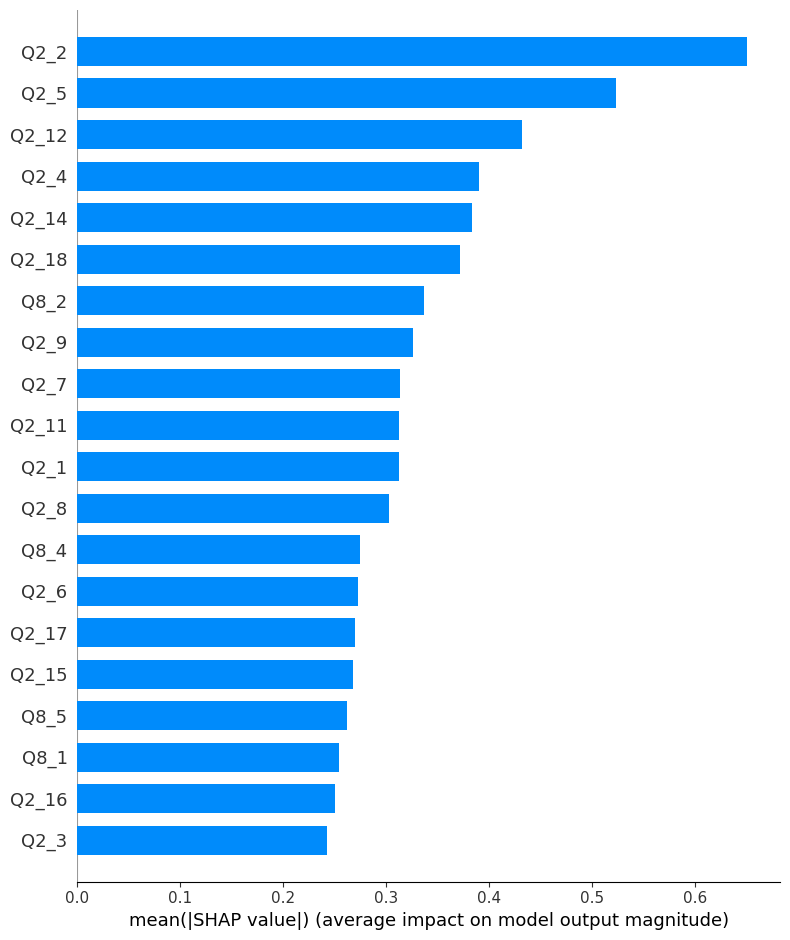

In [66]:
shap.summary_plot(shap_values, X_data, plot_type="bar")

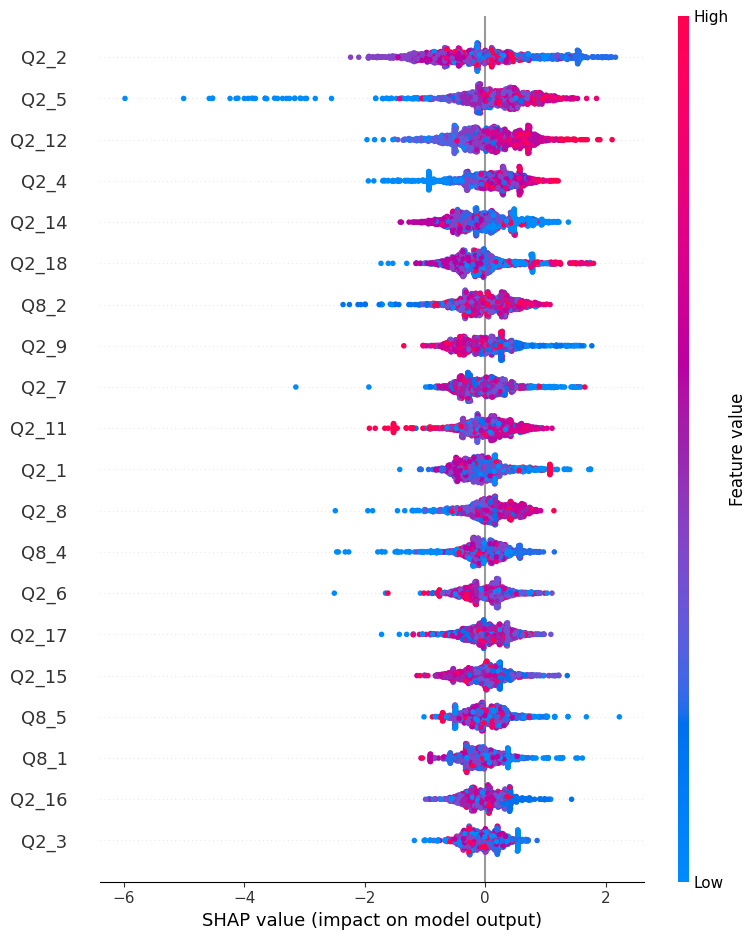

In [68]:
shap.summary_plot(shap_values, X_data)